In [28]:
!pip install tensorflow==2.0.0 -q

ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import SGD, Adam

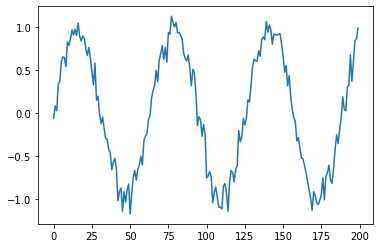

In [47]:
#creating the data 
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [0]:
#Building the data set
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)
  y = series[T+t]
  Y.append(y)


X = np.array(X).reshape(-1,T,1)
Y = np.array(Y) 

In [49]:
type(Y)

numpy.ndarray

In [50]:
N = len(X)
N

190

In [51]:
print("shape of X: " + str(X.shape) + " shape of Y: " + str(Y.shape))

shape of X: (190, 10, 1) shape of Y: (190,)


In [0]:
#Building the model
i = Input(shape=(T,1))
x = SimpleRNN(5, activation='tanh')(i)
x = Dense(1)(x)

model = Model(i,x)

In [61]:
#Compiling and fitting
model.compile(
    optimizer = Adam(0.1),
    loss = 'mse'
)

r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs = 80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 9ms/sample - loss: 0.6434 - val_loss: 0.2371
Epoch 2/80
95/95 [==============================] - 0s 280us/sample - loss: 0.1922 - val_loss: 0.0909
Epoch 3/80
95/95 [==============================] - 0s 284us/sample - loss: 0.0770 - val_loss: 0.1095
Epoch 4/80
95/95 [==============================] - 0s 268us/sample - loss: 0.0843 - val_loss: 0.0295
Epoch 5/80
95/95 [==============================] - 0s 307us/sample - loss: 0.0395 - val_loss: 0.0692
Epoch 6/80
95/95 [==============================] - 0s 293us/sample - loss: 0.0615 - val_loss: 0.0347
Epoch 7/80
95/95 [==============================] - 0s 247us/sample - loss: 0.0362 - val_loss: 0.0383
Epoch 8/80
95/95 [==============================] - 0s 261us/sample - loss: 0.0410 - val_loss: 0.0306
Epoch 9/80
95/95 [==============================] - 0s 286us/sample - loss: 0.0329 - val_loss: 0.0353
Epoch 10/80
95/95 [=====================

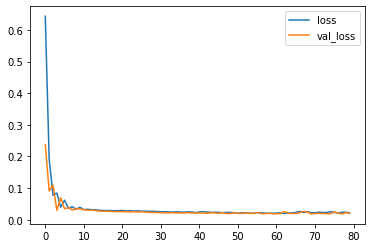

In [62]:
#plotting loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
#1-step forecast
validation_target = Y[-N//2:]
validation_prediction = []

i = -N//2

while len(validation_prediction) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0]
  i += 1

  validation_prediction.append(p)



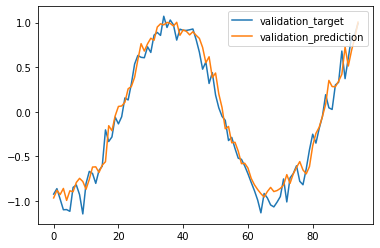

In [64]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_prediction, label='validation_prediction')
plt.legend()

In [0]:
#Multi-step forecast
validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  
  validation_prediction.append(p)
  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

  

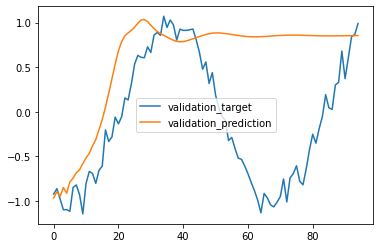

In [66]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_prediction, label='validation_prediction')
plt.legend()